# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [2]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [5]:
# TODO: Merge these two dataframes together
# Filter both datasets to only include data from Minas Gerais
coffee_mg = coffee[coffee['subdivision'] == 'Minas Gerais']
weather_mg = weather[weather['subdivision'] == 'Minas Gerais']

# Merge the datasets on the 'year' column
combined_df = pd.merge(coffee_mg, weather_mg, on='year', how='inner')

#preview summary of dataframe
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       18 non-null     object 
 1   subdivision_x                 18 non-null     object 
 2   type                          18 non-null     object 
 3   60kgs_bag                     18 non-null     float64
 4   year                          18 non-null     int64  
 5   nonbearing_trees              17 non-null     float64
 6   bearing_trees                 17 non-null     float64
 7   nonbear_hectares              17 non-null     float64
 8   bearing_hectares              17 non-null     float64
 9   bearing_trees_per_hectare     17 non-null     float64
 10  nonbearing_trees_per_hectare  17 non-null     float64
 11  rain_max                      18 non-null     float64
 12  temp_avg                      18 non-null     float64
 13  temp_ma

In [6]:
# TODO: View the first 5 rows of your data

# Preview the result
combined_df.head()

,country,subdivision_x,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision_y
0,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [7]:
# TODO: Check for null values 

combined_df.isnull().sum()

country                         0
subdivision_x                   0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision_y                   0
dtype: int64

In [8]:
# TODO: Drop rows that contain null values

combined_df = combined_df.dropna()

In [9]:
# Re-verifying
combined_df.isnull().sum()  

# Check for the dimensions of the dataframe
combined_df.shape          

(17, 20)

In [10]:
# TODO: BEGIN YOUR EDA!


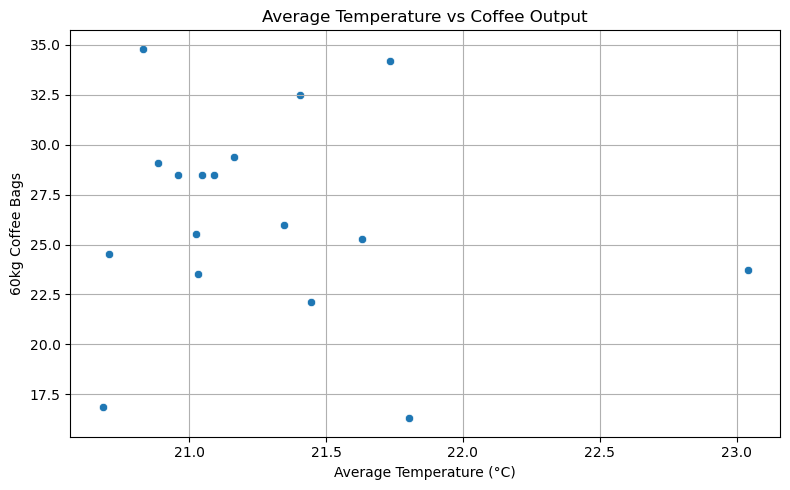

Pearson correlation between temp_avg and 60kg bags: -0.125


In [11]:
# Temperature vs Coffee Production (temp_avg vs 60kgs_bag)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='temp_avg', y='60kgs_bag')
plt.title('Average Temperature vs Coffee Output')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('60kg Coffee Bags')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_temp = combined_df['temp_avg'].corr(combined_df['60kgs_bag'])
print(f"Pearson correlation between temp_avg and 60kg bags: {corr_temp:.3f}")


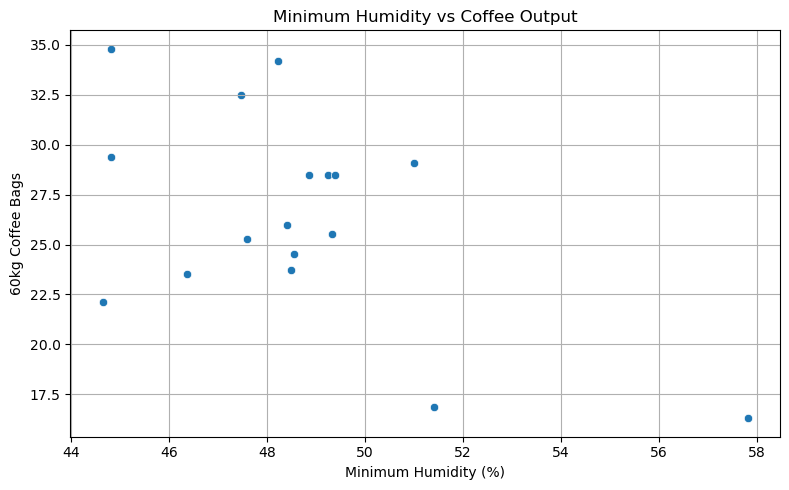

Pearson correlation between hum_min and 60kg bags: -0.540


In [12]:
# Minimum Humidity vs Coffee Production (hum_min vs 60kgs_bag)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='hum_min', y='60kgs_bag')
plt.title('Minimum Humidity vs Coffee Output')
plt.xlabel('Minimum Humidity (%)')
plt.ylabel('60kg Coffee Bags')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_hum = combined_df['hum_min'].corr(combined_df['60kgs_bag'])
print(f"Pearson correlation between hum_min and 60kg bags: {corr_hum:.3f}")


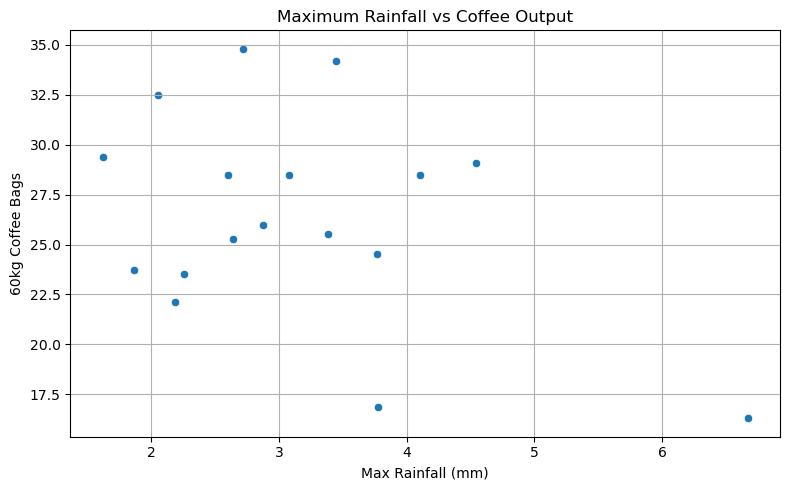

Pearson correlation between rain_max and 60kg bags: -0.396


In [13]:
# Maximum Rainfall vs Coffee Production (rain_max vs 60kgs_bag)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='rain_max', y='60kgs_bag')
plt.title('Maximum Rainfall vs Coffee Output')
plt.xlabel('Max Rainfall (mm)')
plt.ylabel('60kg Coffee Bags')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_rain = combined_df['rain_max'].corr(combined_df['60kgs_bag'])
print(f"Pearson correlation between rain_max and 60kg bags: {corr_rain:.3f}")

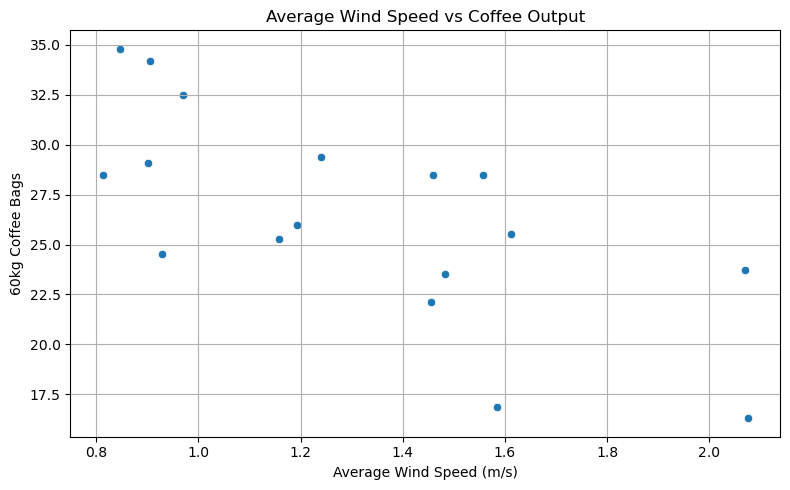

Pearson correlation between wind_avg and 60kg bags: -0.707


In [14]:
# Average Wind Speed vs Coffee Production (wind_avg vs 60kgs_bag)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='wind_avg', y='60kgs_bag')
plt.title('Average Wind Speed vs Coffee Output')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('60kg Coffee Bags')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_wind = combined_df['wind_avg'].corr(combined_df['60kgs_bag'])
print(f"Pearson correlation between wind_avg and 60kg bags: {corr_wind:.3f}")


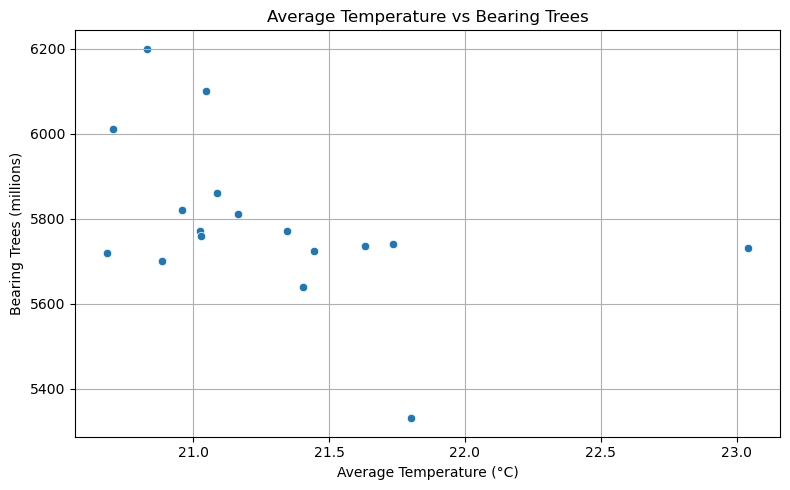

Pearson correlation between temp_avg and bearing_trees: -0.427


In [15]:
# Temperature vs Bearing Trees (temp_avg vs bearing_trees)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='temp_avg', y='bearing_trees')
plt.title('Average Temperature vs Bearing Trees')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Bearing Trees (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_bt_temp = combined_df['temp_avg'].corr(combined_df['bearing_trees'])
print(f"Pearson correlation between temp_avg and bearing_trees: {corr_bt_temp:.3f}")


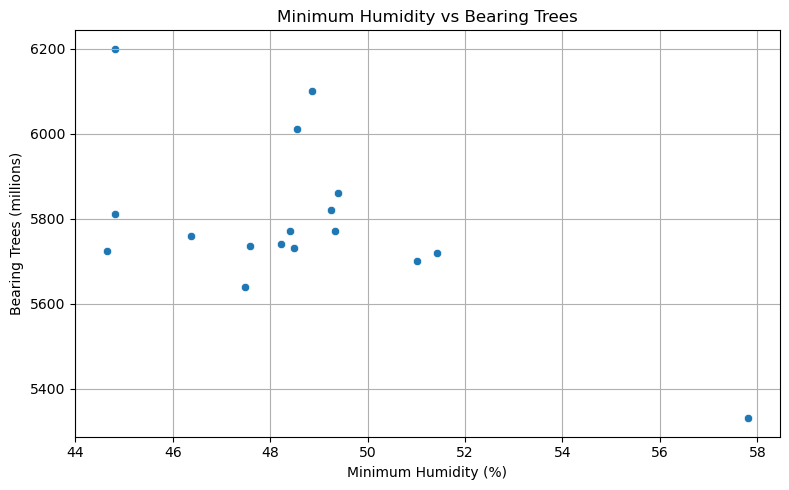

Pearson correlation between hum_min and bearing_trees: -0.593


In [16]:
# Minimum Humidity vs Bearing Trees (hum_min vs bearing_trees)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='hum_min', y='bearing_trees')
plt.title('Minimum Humidity vs Bearing Trees')
plt.xlabel('Minimum Humidity (%)')
plt.ylabel('Bearing Trees (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_bt_hum = combined_df['hum_min'].corr(combined_df['bearing_trees'])
print(f"Pearson correlation between hum_min and bearing_trees: {corr_bt_hum:.3f}")


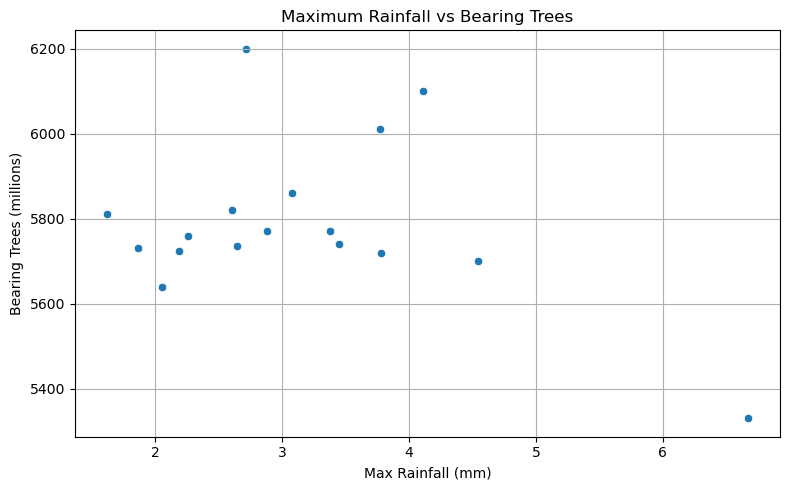

Pearson correlation between rain_max and bearing_trees: -0.333


In [17]:
# Max Rainfall vs Bearing Trees (rain_max vs bearing_trees)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='rain_max', y='bearing_trees')
plt.title('Maximum Rainfall vs Bearing Trees')
plt.xlabel('Max Rainfall (mm)')
plt.ylabel('Bearing Trees (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_bt_rain = combined_df['rain_max'].corr(combined_df['bearing_trees'])
print(f"Pearson correlation between rain_max and bearing_trees: {corr_bt_rain:.3f}")


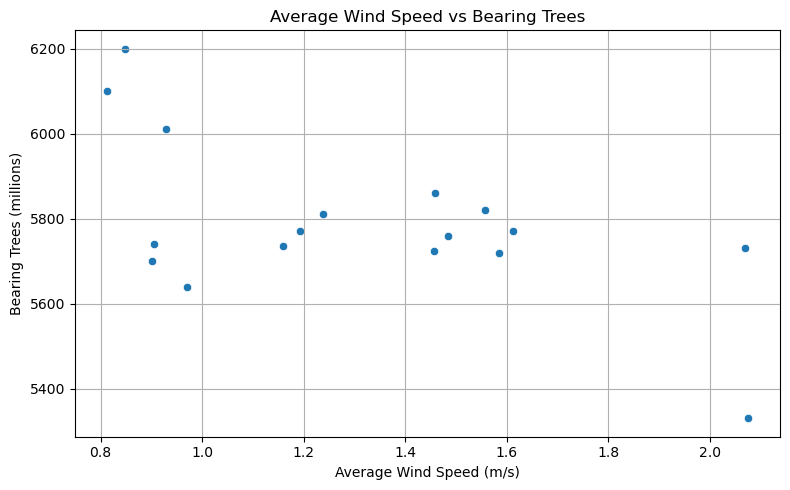

Pearson correlation between wind_avg and bearing_trees: -0.599


In [18]:
# Average Wind Speed vs Bearing Trees (wind_avg vs bearing_trees)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined_df, x='wind_avg', y='bearing_trees')
plt.title('Average Wind Speed vs Bearing Trees')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Bearing Trees (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pearson correlation
corr_bt_wind = combined_df['wind_avg'].corr(combined_df['bearing_trees'])
print(f"Pearson correlation between wind_avg and bearing_trees: {corr_bt_wind:.3f}")


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: The Pearson correlation between temp_avg and 60kg bags is -0.125, showing a very weak negative relationship. The scatter plot doesn’t reveal any clear pattern, so there’s no strong link between average temperature and coffee production. Based on this analysis, average temperature does not appear to be a significant predictor of coffee output.

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: The Pearson correlation between hum_min and 60kg bags is -0.540, which shows a moderate negative relationship. As minimum humidity increases, coffee output tends to decrease. This suggests that higher minimum humidity levels may negatively impact coffee production. A few outliers are also present and may be influencing the strength of the relationship.

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans:The Pearson correlation between rain_max and 60kg bags is -0.396, which indicates a weak to moderate negative relationship. This means that higher maximum rainfall tends to be associated with lower coffee output. The scatter plot doesn’t show a very clear trend, but there are a couple of low-output outliers at higher rainfall levels that may be influencing the correlation.

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Ans: The Pearson correlation between wind_avg and 60kg bags is -0.707, which indicates a strong negative relationship. As average wind speed increases, coffee output tends to decrease noticeably. The scatter plot shows a clearer downward trend, with lower yields at higher wind speeds. This suggests that wind may have a more consistent and stronger negative impact on coffee production.

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Ans: All four weather variables show negative correlations with bearing_trees.

temp_avg: -0.427 (moderate negative) – higher temperatures tend to reduce bearing trees

hum_min: -0.593 (moderate to strong negative) – more humidity is linked to fewer trees

rain_max: -0.333 (weak negative) – slight drop in trees with more rainfall

wind_avg: -0.599 (moderate to strong negative) – higher wind speed is tied to fewer trees

The analysis shows that as these weather conditions increase, the number of bearing trees generally decreases.

Which weather factor seems to influence coffee production the most? 

Ans: Average wind speed appears to influence coffee production the most.

It has the strongest negative correlation with both 60kg coffee bags (-0.707) and the number of bearing trees (-0.599), suggesting that higher wind speeds are consistently associated with lower coffee yield and fewer productive trees. This makes wind a key weather factor to monitor in relation to coffee output.

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Ans: To continue exploring the impacts of weather and economic forces on coffee production, I would collect data on fertilizer and pesticide use. These inputs directly affect the health and yield of coffee trees and may interact with weather conditions. Understanding how much is used, when it’s applied, and the associated costs would help explain variations in production and how farmers respond to changing environmental factors.

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Ans: Based on this analysis, lower wind speeds and moderate humidity levels seem to be the most favorable conditions for growing coffee in Minas Gerias. Higher wind speeds and high minimum humidity were both linked with lower coffee output and fewer bearing trees. While temperature and rainfall also showed negative relationships, they were not as strongly associated. 
Providing these insights to coffee farmers would help them understand the important weather factors to consider and potentially implement strategies to create the optimal growing conditions for their coffee crops (strategies including protecting crops from excessive wind and managing humidity where possible to improve yield).